# Budowa podstawowej sieci rekurencyjnej
Budujemy przykładowy model z prostą siecią rekurencyjną

Podejście "zwykle": dzielimy zbior na uczacy i testujacy (ok. 80% danych dla uczacego), bardziej jako przyklad zeby zrobic jakakolwiek siec, pozniej skorzystamy z walidacji krzyżowej.

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import keras

import import_ipynb
from data_preprocessing import split_working_faulty_blocks

In [ ]:
working_blocks_df, faulty_blocks_df = split_working_faulty_blocks()

In [ ]:
# przemieszajmy bloki danych
from sklearn.utils import shuffle

# utworzmy pakiety danych po 5 chwil czasowych nalezy miec na uwadze
# ze dane moga nie byc podzielne akurat przez 5 wiec usunmy kilka chwil czasowych
# na koncu obu zbiorow (zapisow dla dzialajacego i niedzialajaceg urzadzenia)
working_blocks_rest = len(working_blocks_df) % 5
faulty_blocks_rest = len(faulty_blocks_df) % 5

working_blocks_df = working_blocks_df[:-working_blocks_rest]
faulty_blocks_df = faulty_blocks_df[:-faulty_blocks_rest]

working_blocks_packets_df = np.array_split(working_blocks_df, int(len(working_blocks_df) / 5))
faulty_blocks_packets_df = np.array_split(faulty_blocks_df, int(len(faulty_blocks_df) / 5))

# dodajmy klasy zeby bylo wiadomo co jest czym -> nim przemieszamy pomiedzy klasami
working_blocks_packets_with_class = []

for i in range(len(working_blocks_packets_df)):
  working_blocks_packets_with_class.append( [working_blocks_packets_df[i].to_numpy(), 1] )

faulty_blocks_packets_with_class = []

for i in range(len(faulty_blocks_packets_df)):
  faulty_blocks_packets_with_class.append( [faulty_blocks_packets_df[i].to_numpy(), 0] )

input_list_completed = working_blocks_packets_with_class.copy()
input_list_completed.extend(faulty_blocks_packets_with_class)

# przemieszajmy dane po zlaczeniu
input_list_completed = shuffle(input_list_completed)

In [ ]:
# teraz to, co tygrysy lubia najbardziej:
# dzielimy dane na uczace i testujace oraz w ich obrebie na parametry wejsciowe i klasy
# co daje 4 zbiory
from sklearn.model_selection import train_test_split
X = []
y = []

for i in range(len(input_list_completed)):
  X.append(input_list_completed[i][0])
  y.append(input_list_completed[i][1])

# podzielmy dane - 80% na uczace, 20% - testujace
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(len(y_train), 1) 
y_test = np.array(y_test, dtype=float).reshape((len(y_test), 1))

# tf.convert_to_tensor(X_train, dtype=tf.float32)
# tf.convert_to_tensor(X_test, dtype=tf.float32)

print(X_test.shape)
print(y_test.shape)

(166, 5, 9)
(166, 1)


In [ ]:
import tensorflow as tf

# typowy sekwencyjny model
model = Sequential()
# dodajemy warstwe rekurencyjna, input_shape w naszym przypadku bedzie 31 (minut) x 9 parametrow
# (nie liczac usunietego uprzednio indeksu wskazujacego z ktora minuta mamy do czynienia)
model.add(SimpleRNN(15, input_shape=(5, 9), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(10, activation='relu', return_sequences=False))
# warstwa gesta na wyjscie - najbardziej typowe rozwiazanie

# niezmiernie istotne -> binarna entropia krzyzowa wymaga jednego neuronu na wyjsciu
model.add(Dense(units=1, activation='tanh'))
opt = tf.optimizers.Adam(learning_rate=0.007)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# trenowanie modelu
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 4ms/step - loss: 3.8348 - accuracy: 0.4879
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9323 - accuracy: 0.4919
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7217 - accuracy: 0.5121
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7146 - accuracy: 0.4698
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.4859
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.4899
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5121
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5242
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5181
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5101
Epoch 11/

0.9254032373428345


Text(0, 0.5, 'skutecznosc (accuracy)')

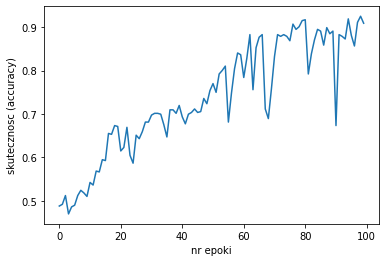

In [ ]:
print(max(history.history['accuracy']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('nr epoki')
plt.ylabel('skutecznosc (accuracy)')

#validation_data=(X_test, y_test))

Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczek

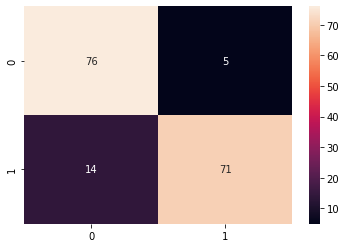

In [ ]:
predictions = model.predict(X_test)

counter = 0
confusion_matrix=np.zeros((2, 2))

for i in range(len(predictions)):
  class_prediction = 0
  if predictions[i] >= 0.5:
    class_prediction = 1

  if class_prediction == y_test[i]:
    confusion_matrix[class_prediction][class_prediction] += 1
  else:
    print(f'Niepoprawna predykcja, oczekiwany: {y_test[i]}, otrzymano: {class_prediction}')
    confusion_matrix[(class_prediction + 1) % 2][class_prediction] += 1

sns.heatmap(confusion_matrix, annot=True)
print(f'Poprawne przyporzadkowania to: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test) * 100} % wszystkich przyporzadkowan')